# Flight Price Prediction
***

## About the project

**Goals**
The main goal is to analyze the flight booking dataset obtained from “Ease My Trip” website and get meaningful information from it. 

**Obs**: 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets

**Questions**
- Does price vary with Airlines?
- Does ticket price change based on the departure time and arrival time?
- How the price changes with change in Source and Destination?
- How does the ticket price vary between Economy and Business class?

**About the data**
- Data was collected in two parts:
    - 1- Economy Class Tickets;
    - 2- Business Class Tickets.

## Loading Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
business = pd.read_csv('business.csv')

In [3]:
economy = pd.read_csv('economy.csv')

## Exploratory Data Analysis - Part 1

### Business Data

#### Data types, missing data and duplicated data

In [4]:
business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [6]:
business.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [7]:
any(business.duplicated())

False

#### Observations
- According to the info above, we can see that there's no missing or duplicated data in the dataset;
- All the variables that indicates a date are not in datetime type;
- Time taken variable has minutes (m) on it;
- Stop variable is not in a good format;
- Price variable is object typed;

#### Number of unique values per column

In [8]:
business.nunique()

date            49
airline          2
ch_code          2
num_code       264
dep_time       166
from             6
time_taken     373
stop            25
arr_time       176
to               6
price         2358
dtype: int64

### Economy Data

#### Data types, missing data and duplicated data

In [9]:
economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [10]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [11]:
economy.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [12]:
any(economy.duplicated())

True

#### Observations
- According to the info above, we can see that there's no missing data in the dataset;
- It seems that there are some duplicated date in the dataset;
- All the variables that indicates a date are not in datetime type;
- Time taken variable has minutes (m) on it;
- Price variable is object typed;

#### Number of unique values per column

In [13]:
economy.nunique()

date            49
airline          8
ch_code          8
num_code      1254
dep_time       251
from             6
time_taken     483
stop            37
arr_time       266
to               6
price         9819
dtype: int64

## Data Preprocessing - Part 1

### Adding a new column "class" to each datast

In [14]:
economy['class'] = 'economy'

In [15]:
business['class'] = 'business'

### Data joining

Joining the datasets, so that both can be analysed together

In [16]:
df = pd.concat([business, economy])

In [17]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 29.8+ MB


- According to the info above, we can see that there's no missing data in the dataset;
- All the variables that indicates a date are note in datetime type;
- Time taken variable has minutes (m) on it;
- Stop variable is not in a good format;
- Price variable is object typed;

### Changing from object to datetime type

In [19]:
#Removing all "-" from the date
df['date'] = df['date'].str.strip('-')

In [20]:
df['date'] = pd.to_datetime(df['date'])

### Dropping the flight code

In [21]:
df.drop(columns = ['num_code', 'ch_code'], inplace = True)

### Formating the time_taken variable

In [22]:
#Removing characters 'h' and 'm'
df['time_taken'] = df['time_taken'].str.replace('h','')

In [23]:
df['time_taken'] = df['time_taken'].str.strip('m')

In [24]:
df['time_taken'] = (df['time_taken'].str.replace(' ',''))

In [25]:
df['time_taken'] = df['time_taken'].str.replace('.','')

In [26]:
df['time_taken'] = df['time_taken'].astype('int')

### Stop Column

In [27]:
#Replacing / removing unwanted characters
df['stop'] = df['stop'].str.replace('\n','')
df['stop'] = df['stop'].str.replace('\t','')
df['stop'] = df['stop'].str.replace('-stop','')
df['stop'] = df['stop'].str.replace('-stopVia','')
df['stop'] = df['stop'].str.replace('Via','')

In [28]:
df[['stop', 'stop_place']] = (df['stop'].str.split(' ', 1, expand=True))

In [29]:
df['stop'] = df['stop'].str.replace('non', '0') 

### Converting the price column from string to integer

In [30]:
df['price'] = (df['price'].str.replace(',','')).astype(int)

## Feature Engineering

### Creating a new variable that directly displays the travel route (origin and destination)

In [31]:
df['route'] = df['from'] + '-' + df['to']

In [32]:
df.drop(columns = ['from', 'to'], axis = 1, inplace = True)

### Creating a new departure and arrival time variable

In [33]:
df['dep_time'] = ((df['dep_time'].str).replace(':', '')).astype('int')

In [34]:
df['arr_time'] = ((df['arr_time'].str).replace(':', '')).astype('int')

In [35]:
time_ranges = [0, 700, 1200, 1800, 2359]
time_label = ['early_morning', 'morning', 'evening', 'night']

df['dep_time'] = (pd.cut(df['dep_time'], bins = time_ranges, labels = time_label)).astype('str')
df['arr_time'] = (pd.cut(df['arr_time'], bins = time_ranges, labels = time_label)).astype('str')

In [36]:
df['flight_time'] = df['dep_time'] + '-' + df['arr_time']

In [37]:
df.drop(columns = ['dep_time', 'arr_time', 'stop_place'], axis = 1, inplace = True)

### Data Type

In [38]:
cols = []
cols_num = []

def sep_by_dtype(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            cols.append(col)
        elif data[col].dtype == 'int':
            cols_num.append(col)
        elif data[col].dtype == 'float':
            cols_num.append(col)

sep_by_dtype(df)

## Exploratory Data Analysis - Part 2

### Data

In [39]:
df.head()

,date,airline,time_taken,stop,price,class,route,flight_time
0,2022-11-02,Air India,200,0,25612,business,Delhi-Mumbai,evening-night
1,2022-11-02,Air India,215,0,25612,business,Delhi-Mumbai,night-night
2,2022-11-02,Air India,2445,1,42220,business,Delhi-Mumbai,night-night
3,2022-11-02,Air India,2630,1,44450,business,Delhi-Mumbai,night-night
4,2022-11-02,Air India,640,1,46690,business,Delhi-Mumbai,evening-night


### Data info

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300261 entries, 0 to 206773
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         300261 non-null  datetime64[ns]
 1   airline      300261 non-null  object        
 2   time_taken   300261 non-null  int64         
 3   stop         300261 non-null  object        
 4   price        300261 non-null  int64         
 5   class        300261 non-null  object        
 6   route        300261 non-null  object        
 7   flight_time  300261 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 20.6+ MB


### Univariate Analysis 

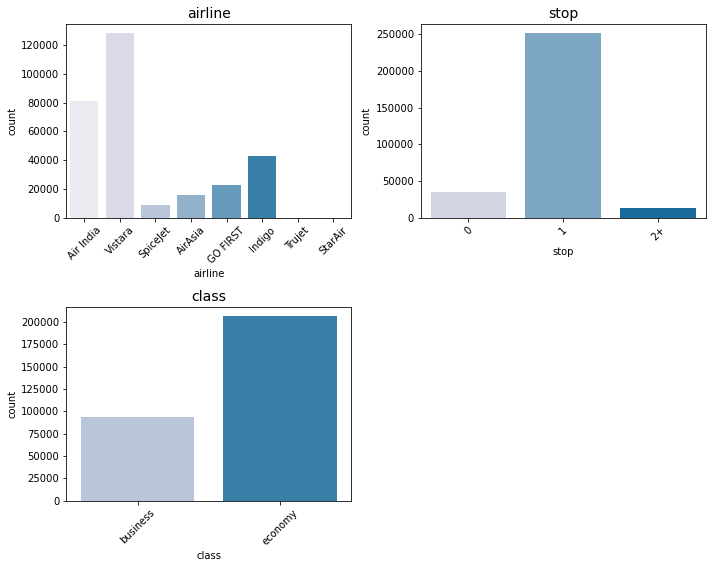

In [41]:
cols.remove('flight_time')
cols.remove('route')
features = cols
plt.figure(figsize = (10, 15))
for i in range(0, len(features)):
    plt.subplot(4, 2, i+1)    
    sns.countplot(data = df[features], x = features[i], palette = "PuBu")
    plt.title(features[i], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.tight_layout()

**Observations**


- The most used airlines are Vistara, Air India and Indigo, respectively;
- The most common flight origins are Delhi and Mumbai, and these are also the most common destination;
- Most flights have one stop during the flight;
- Most people travel in economy class.

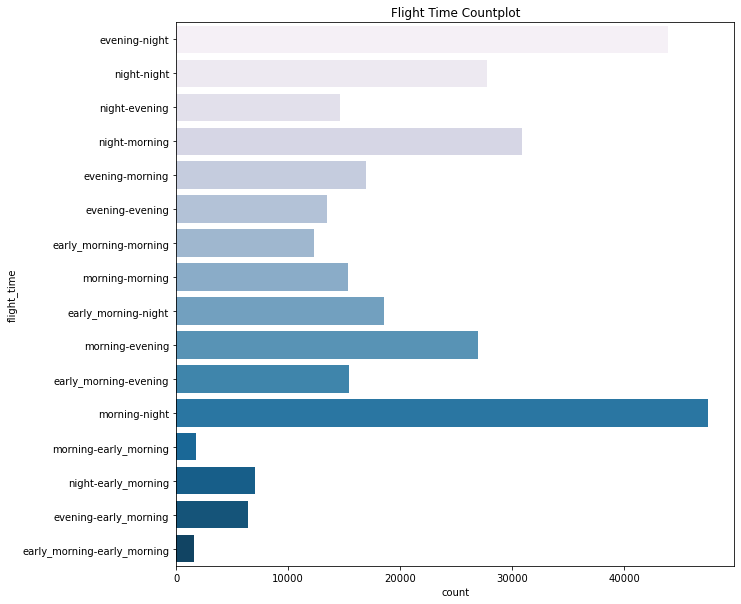

In [42]:
plt.figure(figsize = (10, 10))

sns.countplot(data = df, y = df['flight_time'], palette = "PuBu")

plt.title('Flight Time Countplot')
plt.show()

**Observations**

- Most flights leave in the morming and arrive at night

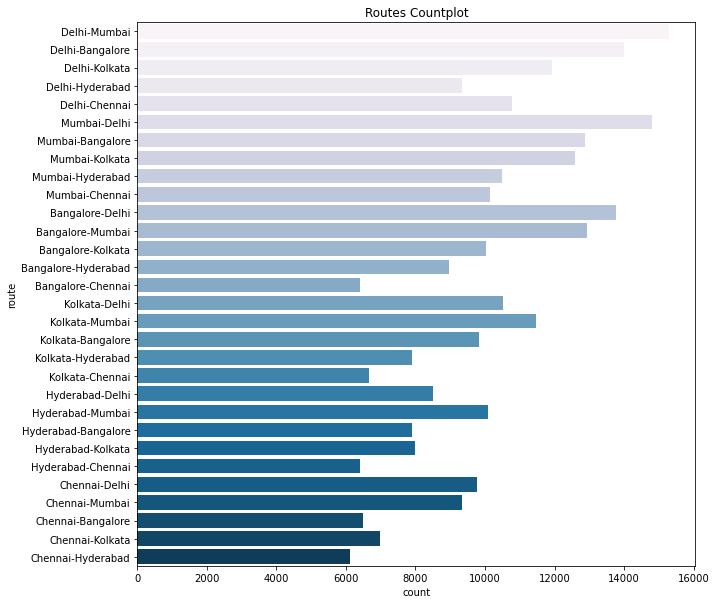

In [43]:
plt.figure(figsize = (10, 10))

sns.countplot(data = df, y = df['route'], palette = "PuBu")

plt.title('Routes Countplot')
plt.show()

**Observations**

- The most common paths are Delhi-Mumbai and Mumbai-Delhi;
- Bangalore is also very common, both as a destination and as an origin.

### Bivariate Analysis

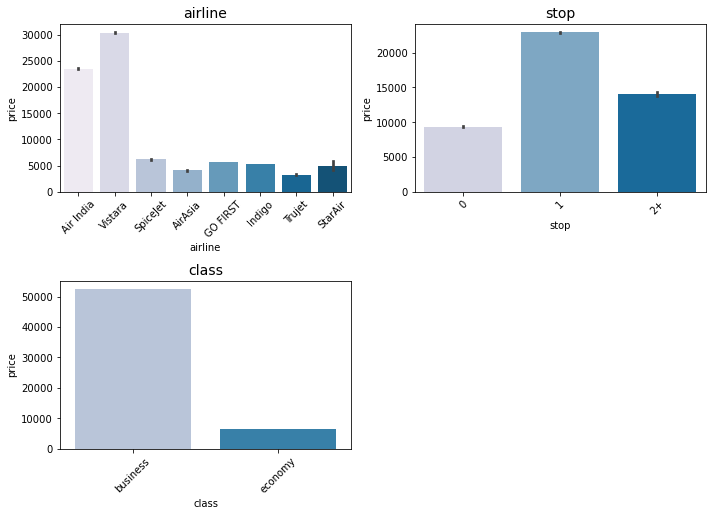

In [44]:
plt.figure(figsize = (10, 10))
for i in range(0, len(cols)):
    plt.subplot(3, 2, i+1)    
    sns.barplot(data = df[features], x = features[i], y = df['price'], palette = "PuBu")
    plt.title(features[i], fontsize = 14)
    plt.xticks(rotation = 45)
    plt.tight_layout()

**Observations**

- Air Asia and Trujet have the lowest prices;
- Flights that are from/to Delhi or Hyderabad are less expensive;
- Flights that are from/to Chennai are the most expensive;
- Flights with 2+ stops are more expensive;
- As imagined, business class flights are more expensive.

#### Travel Route vs. Price

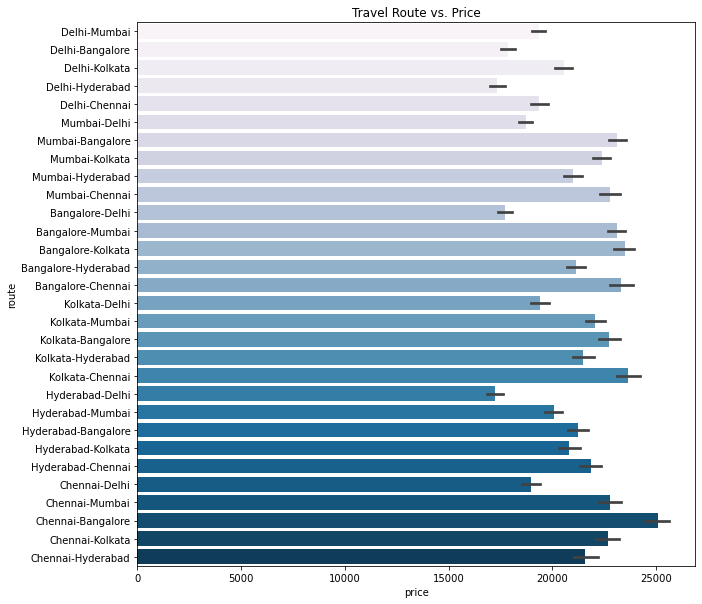

In [45]:
plt.figure(figsize = (10,10))

sns.barplot(data = df, x = df['price'], y = df['route'], palette = 'PuBu')

plt.title('Travel Route vs. Price')
plt.show()

**Observations**

- Chennai-Bangalore is the most expensive flight;
- Flights that are from/to Bangalore or Chennai are more expensive;
- Flights that are from/to Delhi are usually less expensive.

#### Flight time vs. Price

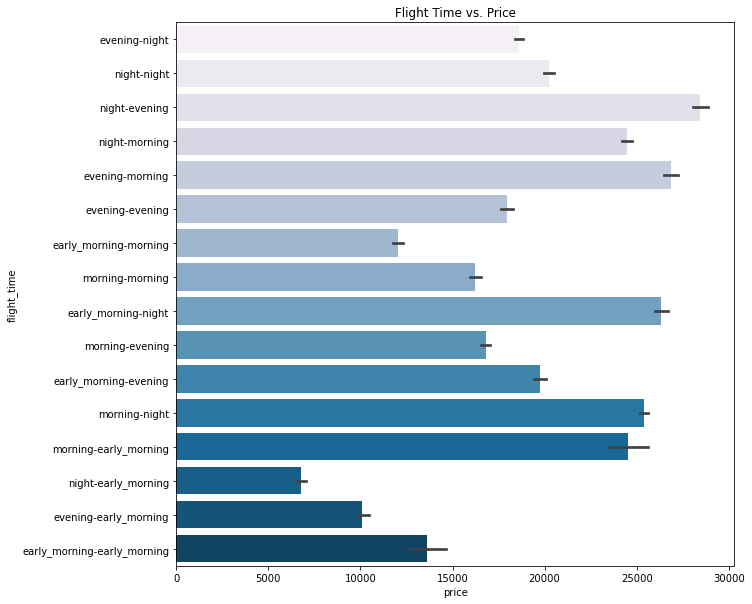

In [46]:
plt.figure(figsize = (10,10))

sns.barplot(data = df, x = df['price'], y = df['flight_time'], palette = 'PuBu')

plt.title('Flight Time vs. Price')
plt.show()

#### Conclusions

- Air India and Vistara are the most used airlines;
- Most airlines were used only in economy class, but Air India and Vistara have both economy and business use;
- Air India and Vistara usually are more expensive than the others airlines;
- Trujet and AirAsia usually have the lowest price;
- As expected, economy class tickets are cheaper than the business ones;
- The most common source and destination cities are Delhi and Mumbai;
- Flights from/to Kolkata, Chennai and Bangalore tends to be more expensive;
- Flights that are from/to Delhi are usually less expensive;
- As the number of stops increases, so does the price.

### Questions

- **Does price vary with Airlines?**
    - Yes, the price between de airlines does vary. Air India, for example, usually is more expensive, while Air Asia has a lower price.
- **Does ticket price change based on the departure time and arrival time?**
    - Yes, the price does vary according to the departure and arrival time. Flights that leave in the morning or at night, for example, usually are more expensive than the ones that leaves in the evening, this may be because the ealier people arrive at their destination, the sooner they can finish what they have to do or enjoy the place.
- **How does the price change with change in Source and Destination?**
    - The price depends a lot on the origin and destination. For example, flights from/to Chennai or Bangalore are usually more expensive, while the ones that are from/to Delhi are cheaper.
- **How does the ticket price vary between Economy and Business class?**
    - Business class tickets are way more expensive than the economy ones, because they have more space.

## Data Preprocessing - Part 2

### Dealing with categorical data

In [47]:
cols = []
cols_num = []

def sep_by_dtype(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            cols.append(col)
        elif data[col].dtype == 'int':
            cols_num.append(col)
        elif data[col].dtype == 'float':
            cols_num.append(col)

sep_by_dtype(df)

In [48]:
cols

['airline', 'stop', 'class', 'route', 'flight_time']

In [49]:
a = pd.get_dummies(df[cols])
data = df.drop(cols, axis = 1, inplace = True)
data = pd.concat([df, a], axis = 1)

### Scaling the data

In [50]:
X = data.drop(columns = ['price', 'date'], axis = 1)
y = data['price']

scaler = StandardScaler()
newX = scaler.fit_transform(X)

## Machine Learning - Part 1 | Linear Regression

In [51]:
Xc = sm.add_constant(newX)
model = sm.OLS(y, Xc)
model_v1 = model.fit()

In [52]:
model_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 5.273e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:40:56   Log-Likelihood:            -3.0824e+06
No. Observations:              300261   AIC:                         6.165e+06
Df Residuals:                  300205   BIC:                         6.165e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.092e+04     18.092   1156.071      0.000    2.09e+04     2.1e+04
x1           759.6453     21.618     35.140      0.000     717.276     802.015
x2         -3.753e+14   4.35e+14     -0.863      0.388   -1.23e+15    4.77e+14
x3         -1.906e+14   2.21e+14     -0.863      0.388   -6.23e+14    2.42e+14
x4         -2.258e+14   2.62e+14     -0.863      0.388   -7.39e+14    2.87e+14
x5         -2.967e+14   3.44e+14     -0.863      0.388    -9.7e+14    3.77e+14
x6         -1.443e+14   1.67e+14     -0.863      0.388   -4.72e+14    1.83e+14
x7         -1.206e+13    1.4e+13     -0.863      0.388   -3.94e+13    1.53e+13
x8         -9.885e+12   1.15e+13     -0.863      0.388   -3.23e+13    1.26e+13
x9         -4.183e+14   4.85e+14     -0.863      0.388   -1.37e+15    5.32e+14
x10         1.361e+15   1.81e+15      0.752      0.452   -2.19e+15    4.91e+15
x11         1.552e+15   2.06e+15      0.752      0.452   -2.49e+15     5.6e+15
x12         8.614e+14   1.15e+15      0.752      0.452   -1.38e+15    3.11e+15
x13        -3.368e+13   5.86e+13     -0.575      0.566   -1.49e+14    8.12e+13
x14        -3.368e+13   5.86e+13     -0.575      0.566   -1.49e+14    8.12e+13
x15         4.716e+14   1.29e+14      3.657      0.000    2.19e+14    7.24e+14
x16         6.822e+14   1.87e+14      3.657      0.000    3.17e+14    1.05e+15
x17         5.555e+14   1.52e+14      3.657      0.000    2.58e+14    8.53e+14
x18         5.863e+14    1.6e+14      3.657      0.000    2.72e+14    9.01e+14
x19         6.626e+14   1.81e+14      3.657      0.000    3.07e+14    1.02e+15
x20         4.746e+14    1.3e+14      3.657      0.000     2.2e+14    7.29e+14
x21         5.793e+14   1.58e+14      3.657      0.000    2.69e+14     8.9e+14
x22         4.605e+14   1.26e+14      3.657      0.000    2.14e+14    7.07e+14
x23         4.918e+14   1.34e+14      3.657      0.000    2.28e+14    7.55e+14
x24         5.664e+14   1.55e+14      3.657      0.000    2.63e+14     8.7e+14
x25         6.882e+14   1.88e+14      3.657      0.000    3.19e+14    1.06e+15
x26         6.071e+14   1.66e+14      3.657      0.000    2.82e+14    9.32e+14
x27         5.661e+14   1.55e+14      3.657      0.000    2.63e+14     8.7e+14
x28         6.375e+14   1.74e+14      3.657      0.000    2.96e+14    9.79e+14
x29         7.174e+14   1.96e+14      3.657      0.000    3.33e+14     1.1e+15
x30         5.222e+14   1.43e+14      3.657      0.000    2.42e+14    8.02e+14
x31         4.711e+14   1.29e+14      3.657      0.000    2.19e+14    7.24e+14
x32         5.414e+14   1.48e+14      3.657      0.000    2.51e+14    8.32e+14
x33         5.251e+14   1.44e+14      3.657      0.000    2.44e+14    8.06e+14
x34         5.875e+14   1.61e+14      3.657      0.000    2.73e+14    9.02e+14
x35         5.805e+14   1.59e+14      3.657      0.000    2.69e+14    8.92e+14
x3

In [53]:
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size = 0.2, random_state = 42)

In [54]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [55]:
print("R2 Score: ", round(r2_score(y_test,y_pred), 3))

R2 Score:  0.906


In [56]:
### to be continued